### Online Food Dataset

Description:
The dataset contains information collected from an online food ordering platform over a period of time. 
It encompasses various attributes related to Occupation, Family Size, Feedback etc..

Attributes:

Demographic Information:
Age: Age of the customer.
Gender: Gender of the customer.
Marital Status: Marital status of the customer.
Occupation: Occupation of the customer.
Monthly Income: Monthly income of the customer.
Educational Qualifications: Educational qualifications of the customer.
Family Size: Number of individuals in the customer's family.

Location Information:
Latitude: Latitude of the customer's location.
Longitude: Longitude of the customer's location.
Pin Code: Pin code of the customer's location.
Order Details:

Output: Current status of the order (e.g., pending, confirmed, delivered).
Feedback: Feedback provided by the customer after receiving the order.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
online_food = pd.read_csv(r'C:\Users\user\Desktop\Python Projects\Online Food\onlinefoods.csv')
online_food.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [3]:
# Checking the contents of the 'Output' column
online_food['Output'].value_counts()

Output
Yes    301
No      87
Name: count, dtype: int64

In [4]:
online_food.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [5]:
online_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [6]:
online_food['Output'].unique()

array(['Yes', 'No'], dtype=object)

In [7]:
#Dropping columns of no interest to the analysis
online_food = online_food.drop(columns = ['Unnamed: 12', 'Output'])
online_food.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Positive


In [8]:
online_food['Age'].value_counts()

Age
23    73
22    57
25    52
24    50
26    35
21    23
27    21
32    16
28    15
29    14
20     9
30     9
31     8
19     4
18     1
33     1
Name: count, dtype: int64

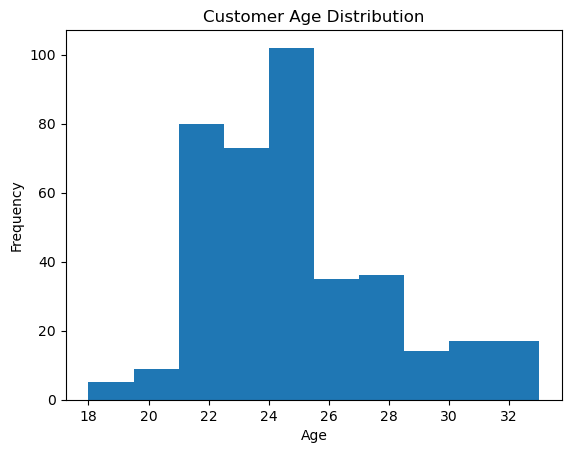

In [9]:
#1. What is the distribution of customers' ages in the dataset?
plt.hist(x=online_food['Age'], bins=10)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

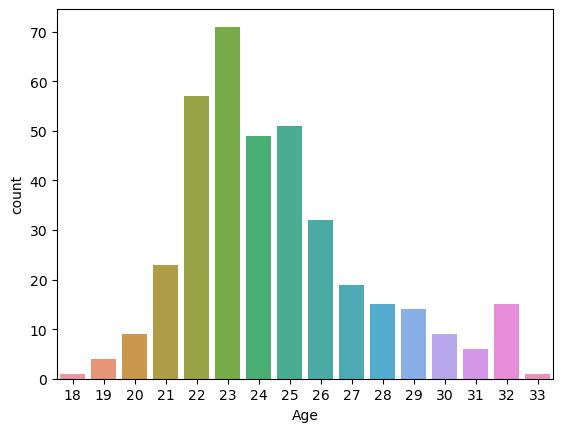

In [52]:
sns.countplot(data=online_food, x='Age')
plt.show()

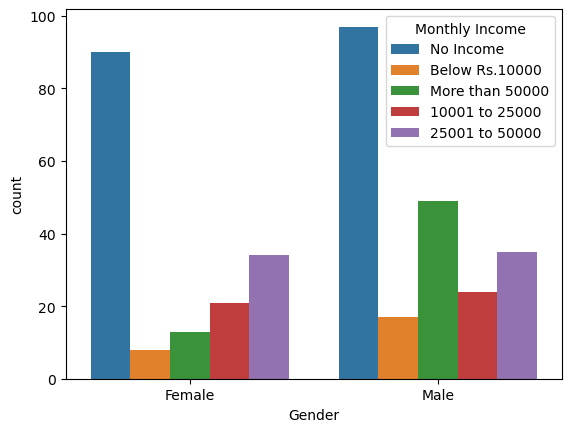

In [10]:
#2. How does the distribution of monthly income vary based on different demographic factors such as gender, marital status, 
# or occupation?

#A. Monthly income by gender
sns.countplot(data=online_food, x='Gender', hue='Monthly Income')
plt.show()

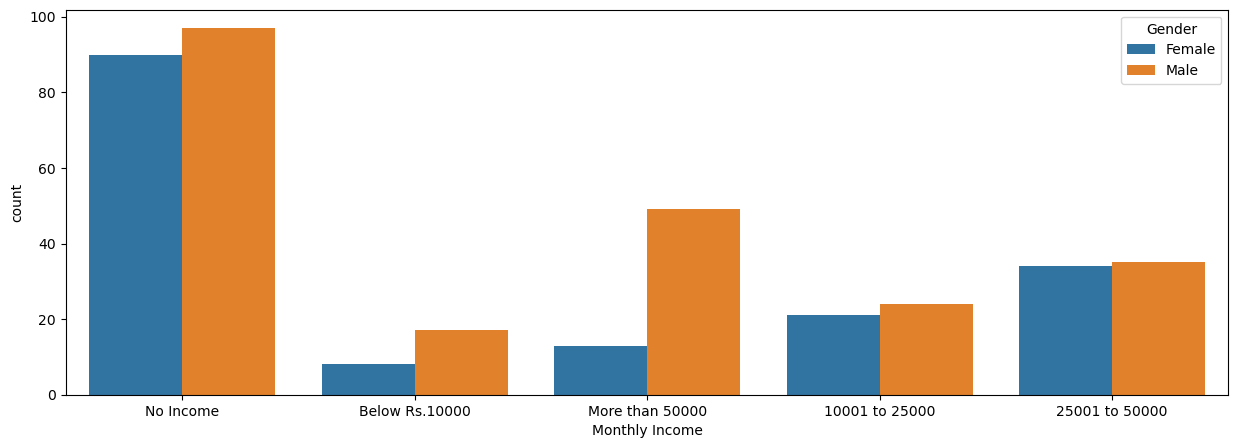

In [11]:
%matplotlib inline
plt.figure(figsize=(15,5))
sns.countplot(data=online_food, x='Monthly Income', hue='Gender')
plt.show()

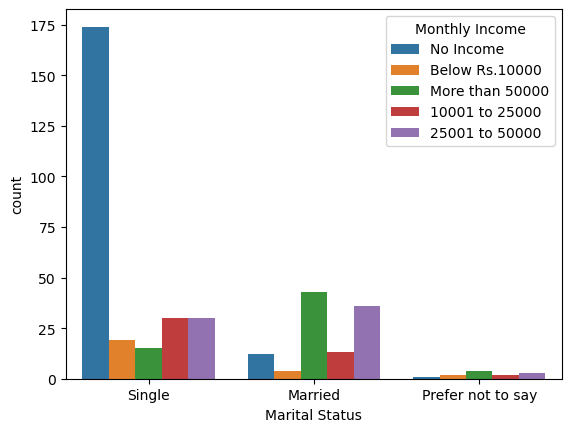

In [12]:
#B. Monthly income by marital status
sns.countplot(data=online_food, x='Marital Status', hue='Monthly Income')
plt.show()

In [13]:
#Removing 'prefer not to say' as it adds nothing to the analysis
online_food=online_food[~online_food['Marital Status'].isin(['Prefer not to say'])]

In [14]:
#Confirming it has been removed
online_food['Marital Status'].value_counts()

Marital Status
Single     268
Married    108
Name: count, dtype: int64

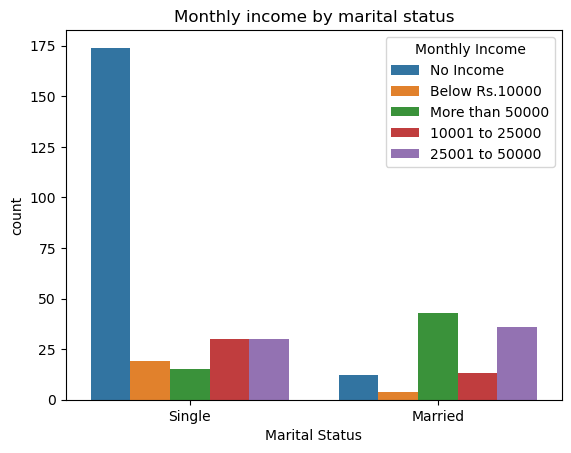

In [15]:
sns.countplot(data=online_food, x='Marital Status', hue='Monthly Income')
plt.title('Monthly income by marital status')
plt.show()

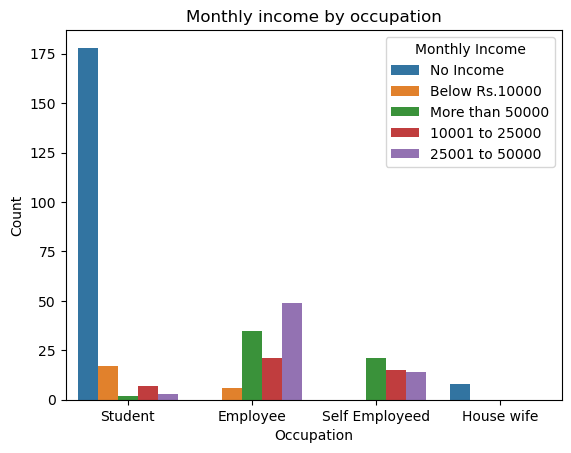

In [16]:
#C. Monthly income by marital status
sns.countplot(data=online_food, x='Occupation', hue='Monthly Income')
plt.title('Monthly income by occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

In [17]:
#Investigated and found out that the categories in the column have not been ordered correctly
# First convert it to categorical
online_food['Monthly Income'] = online_food['Monthly Income'].astype('category')

In [18]:
#Then reorder the values using the .cat accessor object
online_food['Monthly Income']=online_food['Monthly Income'].cat.reorder_categories(new_categories=['No Income','Below Rs.10000', 
                                                                                                    '10001 to 25000', 
                                                                                                    '25001 to 50000', 
                                                                                                    'More than 50000'], 
                                                                                    ordered=True)

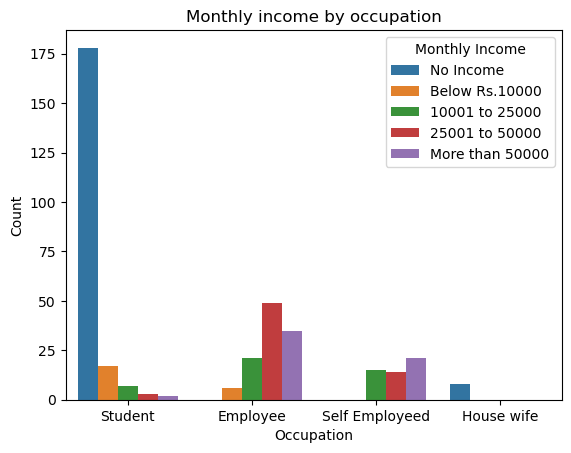

In [19]:
# Plot with ordered categories
sns.countplot(data=online_food, x='Occupation', hue='Monthly Income')
plt.title('Monthly income by occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

In [20]:
#Categories before mapping
online_food['Monthly Income'].value_counts()

Monthly Income
No Income          186
25001 to 50000      66
More than 50000     58
10001 to 25000      43
Below Rs.10000      23
Name: count, dtype: int64

In [21]:
#Converting monthly income to int for further analysis. This will be achieved through mapping.
#This will make it possible to correlate monthly income and other numeric columns
category_mapping = {
    'No Income': 0,
    'Below Rs.10000': 10000,
    '10001 to 25000': (10001 + 25000) / 2,  # Average of the range
    '25001 to 50000': (25001 + 50000) / 2,  # Average of the range
    'More than 50000': 60000  # Define the value for 'More than 50000'
}
online_food['Monthly Income'] = online_food['Monthly Income'].map(category_mapping)
online_food['Monthly Income'] = online_food['Monthly Income'].astype('int')

In [22]:
# Confirming the mapping
online_food['Monthly Income'].value_counts()

Monthly Income
0        186
37500     66
60000     58
17500     43
10000     23
Name: count, dtype: int64

In [23]:
#3. Is there any correlation between the number of individuals in a customer's family (family size) and their monthly income?
online_food_numeric = online_food.select_dtypes(include='number')
online_food_numeric.corr()

,Age,Monthly Income,Family size,latitude,longitude,Pin code
Age,1.000000,0.584224,0.193620,-0.008138,0.073364,0.128180
Monthly Income,0.584224,1.000000,0.114124,-0.082974,0.112478,0.159495
Family size,0.193620,0.114124,1.000000,-0.041094,0.057011,0.013152
latitude,-0.008138,-0.082974,-0.041094,1.000000,-0.136135,-0.210654
longitude,0.073364,0.112478,0.057011,-0.136135,1.000000,0.188677
Pin code,0.128180,0.159495,0.013152,-0.210654,0.188677,1.000000


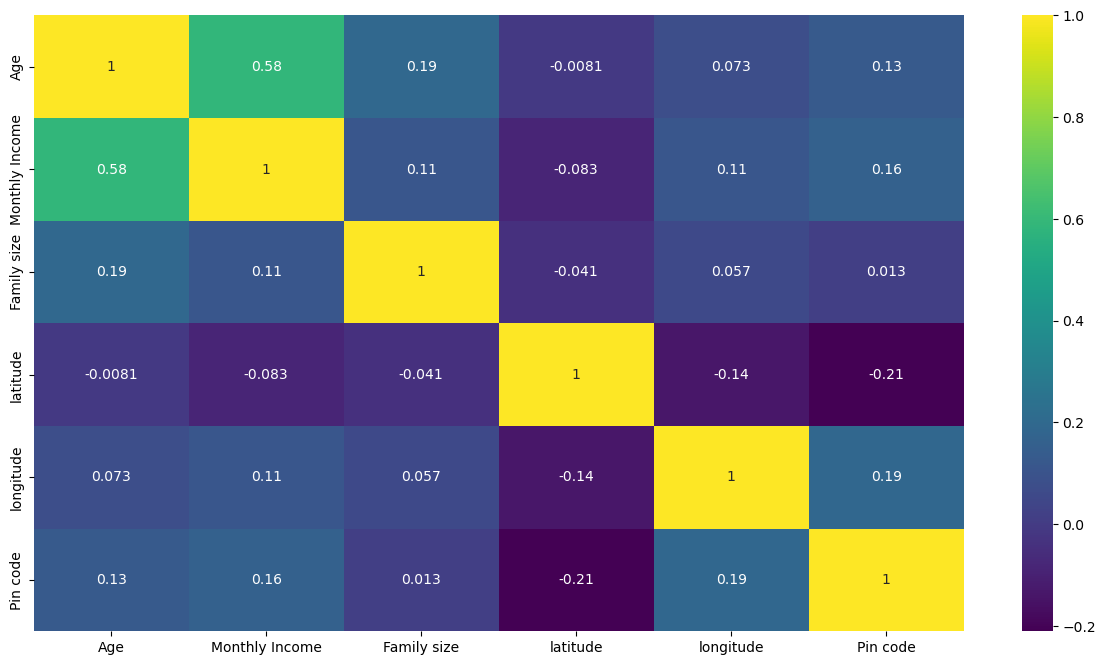

In [24]:
# Visualizing the correlations using a heatmap
correlated = online_food_numeric.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(data=correlated, cmap='viridis', cbar=True, annot=True)
plt.show()

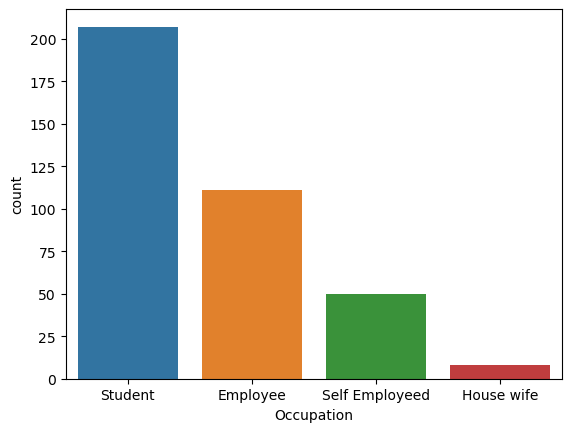

In [25]:
#4. What are the most common occupations among customers who use the online food ordering platform?
sns.countplot(data=online_food, x='Occupation')
plt.show()

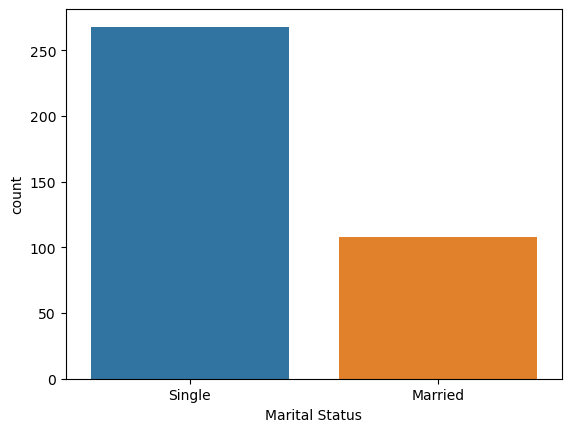

In [26]:
#5. What is the most common gender among customers who use the online food ordering platform?
sns.countplot(data=online_food, x='Marital Status')
plt.show()


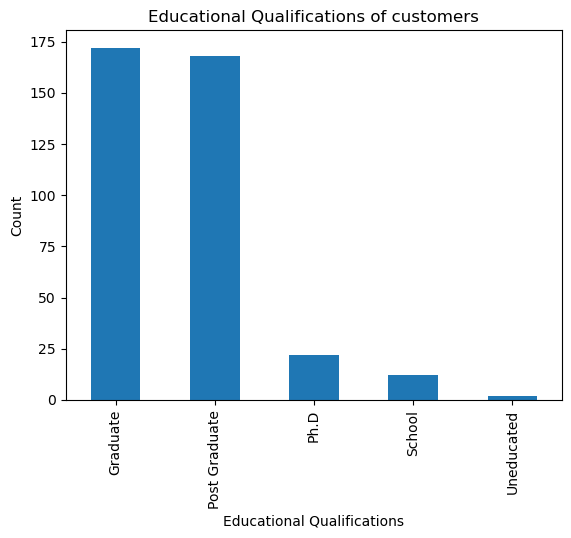

In [66]:
#Most common qualification among customers who use the online food ordering platform
online_food["Educational Qualifications"].value_counts().plot(kind='bar')
plt.title("Educational Qualifications of customers")
plt.ylabel("Count")
plt.show()

In [27]:
#6. Are there any noticeable differences in ordering behavior based on the customer's location (latitude, longitude, pin code)?
#A. According to latitude and longitude

In [28]:
#Converting the feedback column to binary using .map
categories={'Negative ' : 0, 'Positive' : 1}
online_food['Feedback'] = online_food['Feedback'].map(categories)
online_food['Feedback'] = online_food['Feedback'].astype(int)

In [29]:
# Confirming the mapping
online_food['Feedback'].value_counts()

Feedback
1    310
0     66
Name: count, dtype: int64

In [30]:
# Get value counts of combinations of 'latitude' and 'longitude'
combination_counts = online_food.groupby(['latitude', 'longitude']).size()
combination_counts

latitude  longitude
12.8652   77.5240       1
12.8834   77.5486       2
12.8845   77.6036      12
12.8893   77.6399       4
12.8988   77.5764       5
                       ..
13.0626   77.5284       7
13.0641   77.5931       5
13.0734   77.5464       4
13.0809   77.5565       2
13.1020   77.5864       2
Length: 76, dtype: int64

In [31]:
# reset_index converts the Series into a DataFrame with the original index values as a new column.
combination_counts_df = combination_counts.reset_index(name='Count')
combination_counts_df

,latitude,longitude,Count
0,12.8652,77.5240,1
1,12.8834,77.5486,2
2,12.8845,77.6036,12
3,12.8893,77.6399,4
4,12.8988,77.5764,5
...,...,...,...
71,13.0626,77.5284,7
72,13.0641,77.5931,5
73,13.0734,77.5464,4
74,13.0809,77.5565,2


In [32]:
combination_counts_df.sort_values(by='Count', ascending=False)

,latitude,longitude,Count
39,12.9770,77.5773,36
40,12.9783,77.6408,16
44,12.9850,77.5533,14
2,12.8845,77.6036,12
20,12.9369,77.6407,11
...,...,...,...
12,12.9251,77.4992,1
10,12.9155,77.5135,1
47,12.9883,77.5987,1
49,12.9890,77.5332,1


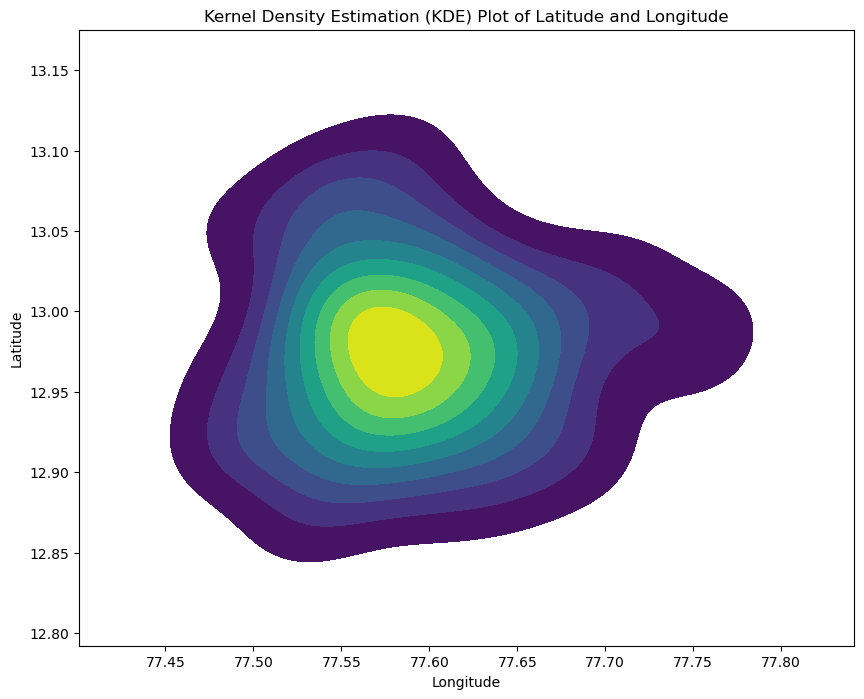

In [33]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=combination_counts_df, x='longitude', y='latitude', cmap='viridis', fill=True)
plt.title('Kernel Density Estimation (KDE) Plot of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

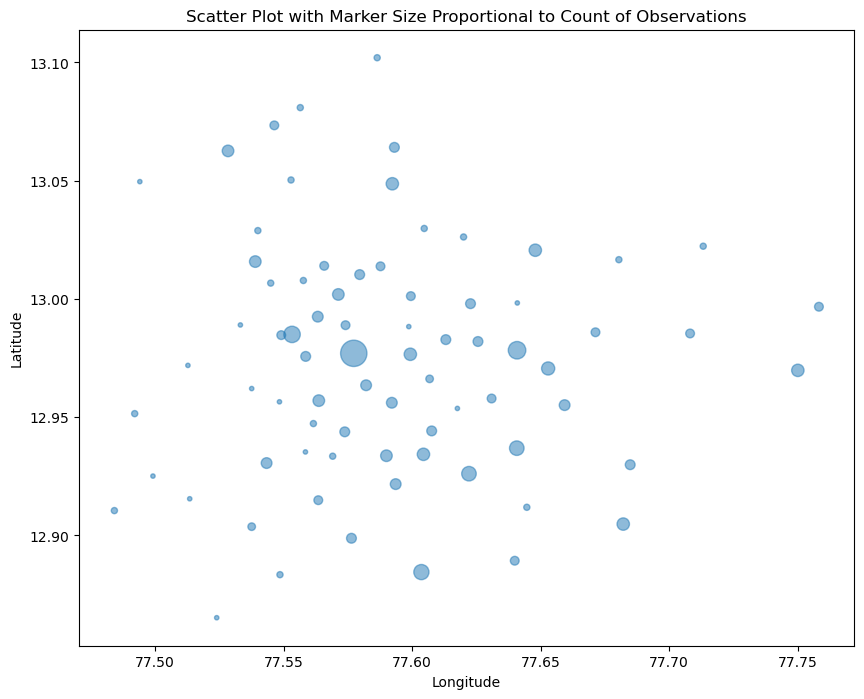

In [34]:
plt.figure(figsize=(10, 8))
plt.scatter('longitude', 'latitude', s=combination_counts_df['Count']*10, alpha=0.5, data=combination_counts_df)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot with Marker Size Proportional to Count of Observations')
plt.show()

In [35]:
#6. Are there any noticeable differences in ordering behavior based on the customer's location (latitude, longitude, pin code)?
#B. According to pin code

In [36]:
#Using .value_counts()
pin_v = online_food['Pin code'].value_counts().head(10)

In [37]:
pin_vdf = pin_v.reset_index(name='Total')
pin_vdf

,Pin code,Total
0,560009,36
1,560038,16
2,560010,14
3,560076,12
4,560095,11
5,560034,11
6,560075,9
7,560001,8
8,560029,8
9,560043,8


In [38]:
#Aggregating to see which pin codes have the most orders
#Using groupby
pin = online_food.groupby('Pin code').size() #.size() returns a pandas Series
pin = pin.sort_values(ascending = False).head(10) #Arranging the 10 values in descending order making sure to .head() after sort
pin

Pin code
560009    36
560038    16
560010    14
560076    12
560034    11
560095    11
560075     9
560001     8
560043     8
560036     8
dtype: int64

In [62]:
#Converting the Series to a Dataframe in order to plot it
pin_df = pin.reset_index(name='Total')
pin_df

,Pin code,Total
0,560009,36
1,560038,16
2,560010,14
3,560076,12
4,560034,11
5,560095,11
6,560075,9
7,560001,8
8,560043,8
9,560036,8


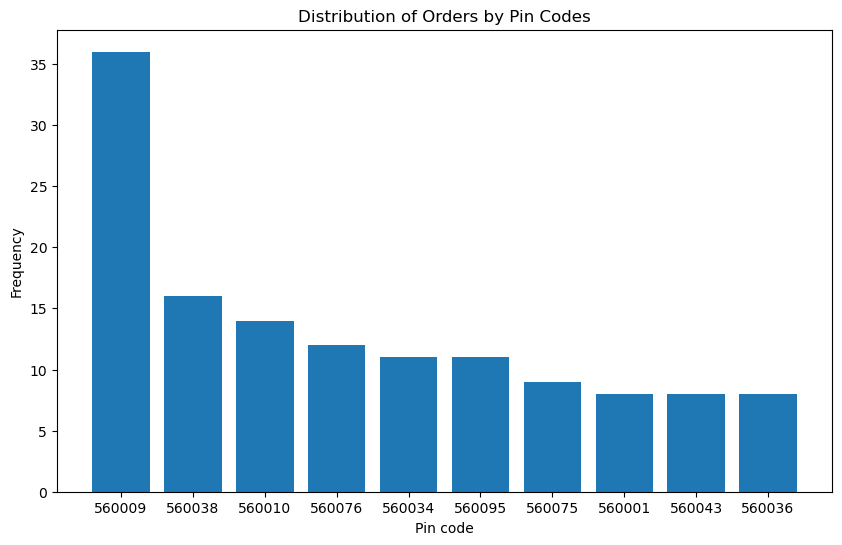

In [40]:
# Distribution of orders by Pin Codes
pin_df['Pin code'] = pin_df['Pin code'].astype(str)
plt.figure(figsize=(10, 6))
plt.bar(pin_df['Pin code'], pin_df['Total'])
plt.xlabel('Pin code')
plt.ylabel('Frequency')
plt.title('Distribution of Orders by Pin Codes')
plt.show()

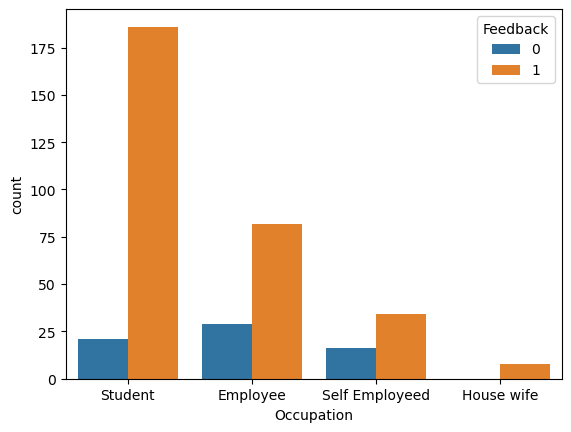

In [41]:
#7. How does customer feedback vary across different demographic groups?
sns.countplot(data=online_food, x='Occupation', hue='Feedback')
plt.show()

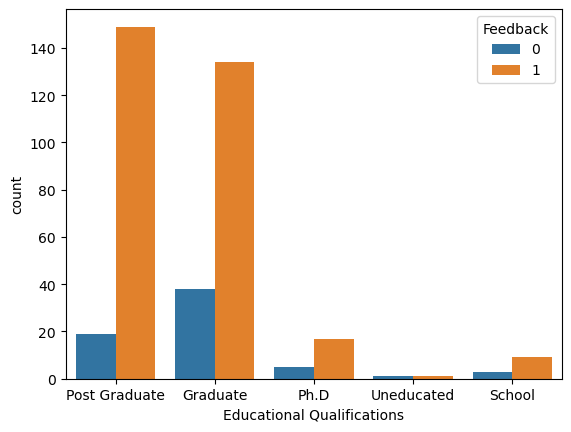

In [42]:
sns.countplot(data=online_food, x='Educational Qualifications', hue='Feedback')
plt.show()

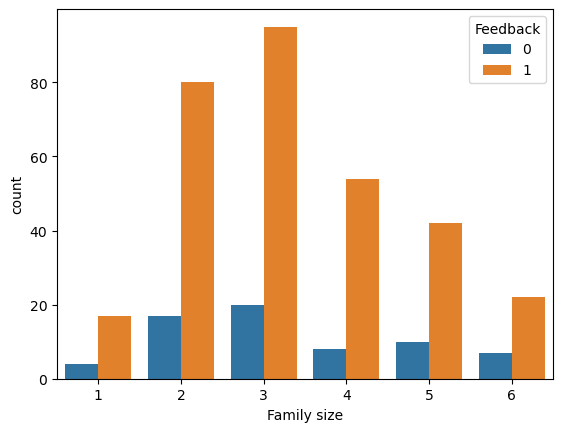

In [43]:
sns.countplot(data=online_food, x='Family size', hue='Feedback')
plt.show()

In [44]:
#8. Can we identify any patterns or trends in customer feedback over time? NO.


In [45]:
#9. Is there any relationship between the distance of a customer's location from a restaurant (calculated using 
# latitude and longitude) and their likelihood of giving positive feedback? NO.

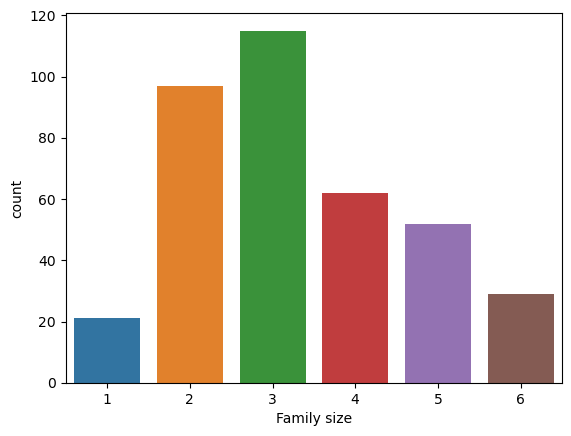

In [46]:
#10. Are there any specific demographic groups that tend to order more frequently than others?
# Families of 3 make the most orders
sns.countplot(data=online_food, x='Family size')
plt.show()

In [47]:
# Can we predict the likelihood of an order being confirmed or delivered based on demographic factors such as age, gender, 
# or educational qualifications? NO.